In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Parte 1: Análisis Exploratorio de Datos enfocándose especialmente en responder la siguiente pregunta de negocio ¿Qué factores están relacionados con que los pasajeros tengan una mayor/menor probabilidad de sobrevivir?

### Comprensión de la estructura de los datos
Primero de todo, dedicaremos unas líneas de código a entender mejor los datos con los cuales vamos a estar trabajando en este Análisis Exploratorio de Datos (EDA). La estructura del CSV, qué información nos aporta cada columna, cómo vamos a poder interpretar esos datos más adelante...


In [3]:
# Cargamos los datos
datos = pd.read_csv("titanic.csv")   # Tenemos el CSV en la misma carpeta, por eso podemos leerlo de esta forma tan sencilla

# La alternativa, si no tenemos el CSV descargado en la misma carpeta, sería:
# url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# datos = pd.read_csv(url)

In [4]:
# Primeros 5 datos

datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Últimos 5 datos

datos.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Filas x columnas

datos.shape

(891, 12)

In [7]:
datos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Cada columna significa lo siguiente:

- PassengerId: identificador único del pasajero.

- Survived: si el pasajero sobrevivió o no (0 = no y 1 = sí).

- Pclass: clase a la que pertenecía el pasajero (más caro a barato): 1ª clase, 2ª o 3ª.

- Name: nombre del pasajero.

- Sex: sexo del pasajero.

- Age: edad del pasajero.

- SibSp: número de hermanos y cónyuges en el barco.

- Parch: número de padres e hijos en el barco.

- Ticket: identificador del billete.

- Fare: precio pagado por el billete.

- Cabin: identificador del camarote asignado al pasajero.

- Embarked: puerto en el que embarcó el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton).

Como vemos, aunque luego entraremos más en detalle, hay ciertas columnas que a priori no nos van a aportar ninguna información acerca de la probabilidad de sobrevivir, véase 'passengerid' o 'ticket', pues son campos aleatorios que no se corresponden con ninguna característica del pasajero.

In [8]:
datos.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Observamos que las columnas se dividen entre las que contienen palabras y las que son números, pero por ahora poco más podemos saber sobre su contenido.

In [9]:
datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aquí se muestra la cantidad de campos nulos en cada columna, vemos que solo afecta a 'age' y a 'cabin'.
- La columna de 'cabin' no nos aporta información útil a la hora de nuestro estudio, pues solo hace referencia a la numeración del camarote, y dado que el 77% son datos nulos, no la analizaremos.
- En cuanto a 'Age', faltan un 20% de los datos, pero sí que podemos presumir que la edad de los pasajeros puede llegar a ser un factor diferencial a la hora de sobrevivir, ya sea porque se les da preferencia en el rescate, o por cuestiones de salud. Lo analizaremos más adelante.

In [10]:
datos.describe()    

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Con este método, de un vistazo, podemos saber cierta información que nos acabará siendo útil más adelante:
- Algo menos del 40% de los pasajeros sobrevivió. 
- La edad promedio de los pasajeros era de unos 30 años, aunque el pasajero de mayor edad tenía 80 años y el más joven tenía menos de un año. Además, el 50% de los pasajeros tenía entre 20 y 38 años.
- El precio del billete medio era de 32.20 libras, siendo el más caro de 512 libras.

### Analizando los datos en profundidad
Acompañaremos nuestro análisis con diferentes gráficos para ver de una forma más visual los resultados.

Total supervivientes (fila '1') y fallecidos (fila '0')

In [11]:
datos["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

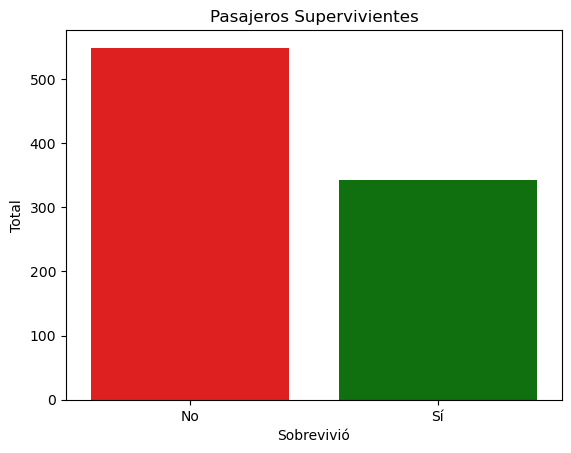

In [12]:
# Este gráfico funciona en jupyter notebook, pero en VS Code sale un error por 'deprecated', y si se soluciona
# entonces no funciona en JN, debido a la diferente versión de cada entorno. Por tanto, dejo la versión de JN.

# Indicamos los datos que queremos graficar y el tipo de gráfico
sns.countplot(data=datos, x='Survived', palette={0: 'red', 1: 'green'})

# Establecemos los textos que aparecerán en el gráfico
plt.title('Pasajeros Supervivientes')
plt.xlabel('Sobrevivió')
plt.ylabel('Total')
plt.xticks([0, 1], ['No', 'Sí'])

# Eliminar la leyenda
plt.legend([], [], frameon=False)

# Mostrar el gráfico
plt.show()

Supervivencia según el sexo del pasajero

In [13]:
datos.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

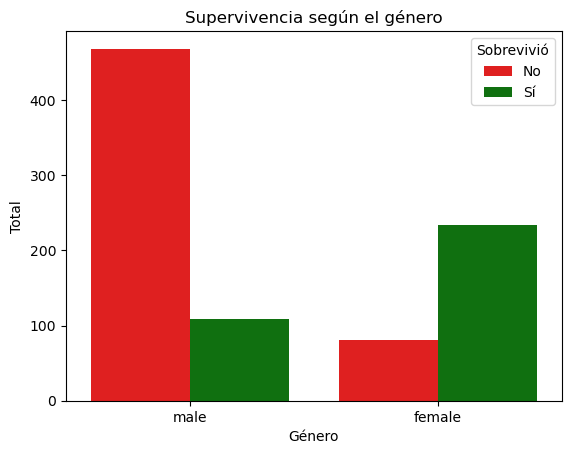

In [14]:
ax = sns.countplot(data=datos, x='Sex', hue='Survived', palette={0: 'red', 1: 'green'})

plt.title('Supervivencia según el género')
plt.xlabel('Género')
plt.ylabel('Total')

# Así logramos modificar la leyenda por los valores deseados
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Sobrevivió')

plt.show()

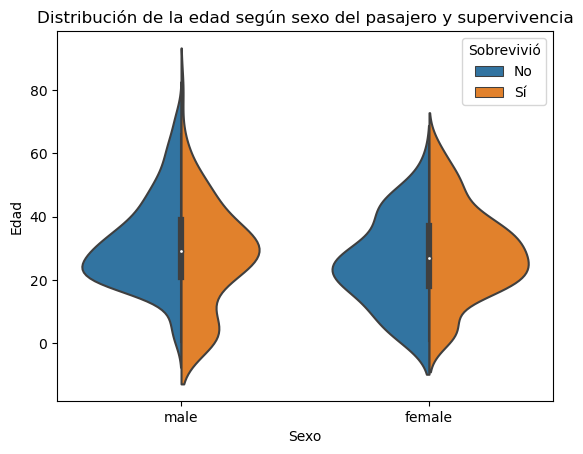

In [15]:
ax = sns.violinplot(x='Sex', y='Age', hue='Survived', data=datos, split=True)

plt.title('Distribución de la edad según sexo del pasajero y supervivencia')
plt.xlabel('Sexo')
plt.ylabel('Edad')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Sobrevivió')

plt.show()

Supervivencia según si el pasajero era menor de 16 años o no

In [16]:
datos.groupby([datos['Age'] < 16, 'Survived'])['Survived'].count()

Age    Survived
False  0           515
       1           293
True   0            34
       1            49
Name: Survived, dtype: int64

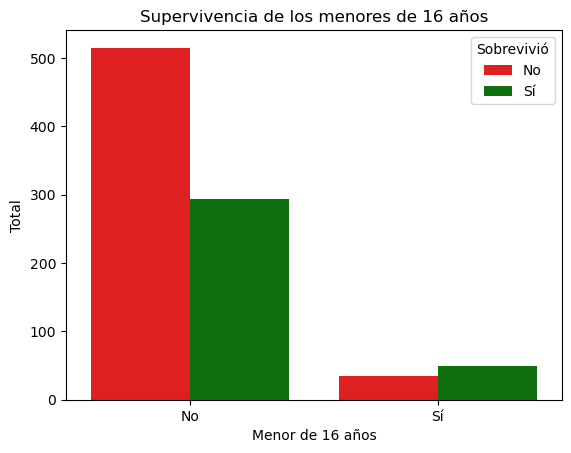

In [17]:
# Para no usar una serie booleana en la gráfica y que nos de error, tenemos que crear una nueva columna 
datos['Menor_16'] = datos['Age'] < 16

ax = sns.countplot(data=datos, x='Menor_16', hue='Survived', palette={0: 'red', 1: 'green'})

plt.title('Supervivencia de los menores de 16 años')
plt.xlabel('Menor de 16 años')
plt.ylabel('Total')
plt.xticks([0, 1], ['No', 'Sí'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Sobrevivió')

plt.show()

Supervivencia en función de la clase en la que viajó el pasajero

In [18]:
datos.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

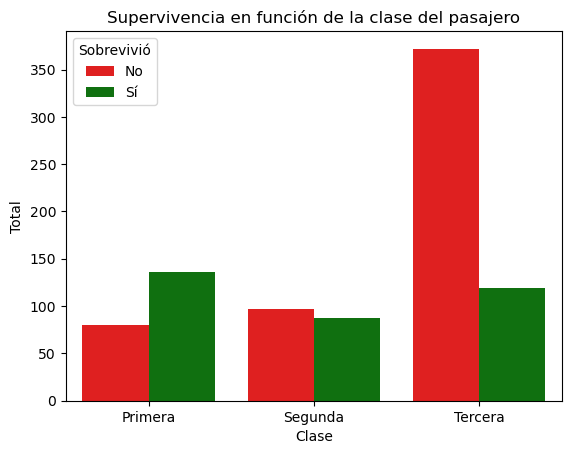

In [19]:
ax = sns.countplot(data=datos, x='Pclass', hue='Survived', palette={0: 'red', 1: 'green'})

plt.title('Supervivencia en función de la clase del pasajero')
plt.xlabel('Clase')
plt.ylabel('Total')
plt.xticks([0, 1, 2], ['Primera', 'Segunda', 'Tercera'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Sobrevivió')

plt.show()

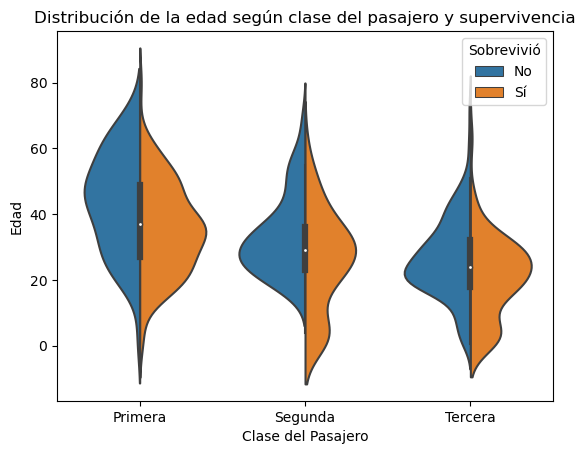

In [20]:
ax = sns.violinplot(x='Pclass', y='Age', hue='Survived', data=datos, split=True)

plt.title('Distribución de la edad según clase del pasajero y supervivencia')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Edad')
plt.xticks([0, 1, 2], ['Primera', 'Segunda', 'Tercera'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Sobrevivió')

plt.show()

Supervivencia según el puerto de embarque de cada viajero

In [21]:
datos.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

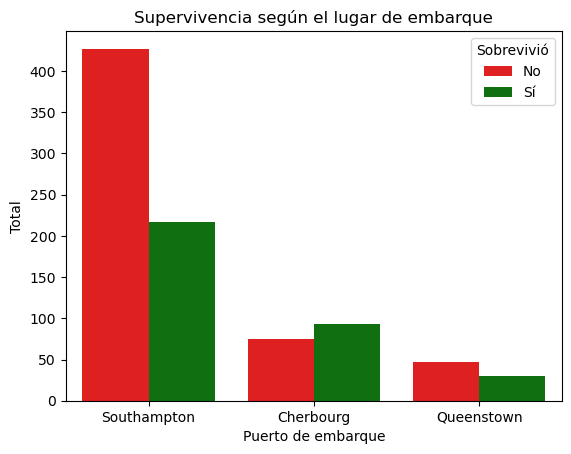

In [22]:
ax = sns.countplot(data=datos, x='Embarked', hue='Survived', palette={0: 'red', 1: 'green'})

plt.title('Supervivencia según el lugar de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Total')

plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Sobrevivió')

plt.show()

Clase del billete del pasajero según la ciudad de embarque

In [23]:
datos.groupby(['Embarked', 'Pclass'])['Survived'].count()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Survived, dtype: int64

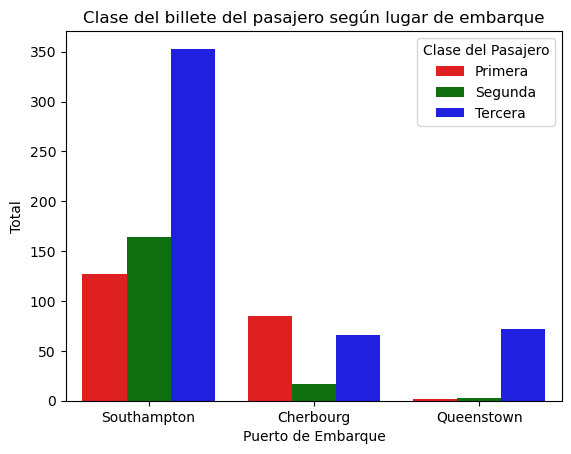

In [24]:
ax = sns.countplot(data=datos, x='Embarked', hue='Pclass', palette={1: 'red', 2: 'green', 3: 'blue'})

plt.title('Clase del billete del pasajero según lugar de embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Total')

plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Primera', 'Segunda', 'Tercera'], title='Clase del Pasajero')

plt.show()

### Análisis de los motivos de una mayor supervivencia

A raíz de la información conseguida, parece obvio que tanto la edad, como el sexo y la clase del billete influenciarion en gran medida las posiblidades de sobrevivir.

Por ello, analizaremos por un lado las probabilidades de sobrevivir siendo mujer o menor de 16 años (ya que históricamente a ambos grupos se les ha dado prioridad en las labores de rescate cuando han sucedido catástrofes); y, por otro lado, las probabilidades habiendo comprado los billetes más caros, los de primera clase.

##### Edad y sexo

In [25]:
datos["niño_mujer"] = "NO"
datos.loc[(datos["Age"] < 16) | (datos["Sex"] == "female") ,"niño_mujer"] = "SI"

datos["niño_mujer"].value_counts()

NO    537
SI    354
Name: niño_mujer, dtype: int64

354 pasajeros se encuadran dentro de mujeres o niños menores de 16 años

In [26]:
datos.groupby(['niño_mujer', 'Survived'])['Survived'].count()

niño_mujer  Survived
NO          0           449
            1            88
SI          0           100
            1           254
Name: Survived, dtype: int64

Es decir, de los 354 pasajeros que eran mujeres o niños menores de 16 años, sobrevivieron ¡254 personas! (el 72%); mientras que entre los 537 hombre mayores de 16 años solo sobrevivieron 88 (16%).

In [27]:
datos.groupby(["niño_mujer"])["Survived"].sum()

niño_mujer
NO     88
SI    254
Name: Survived, dtype: int64

Por otro lado, de las 342 personas que sobrevivieron al accidente, 254 eran mujeres o niños menores de 16 años.

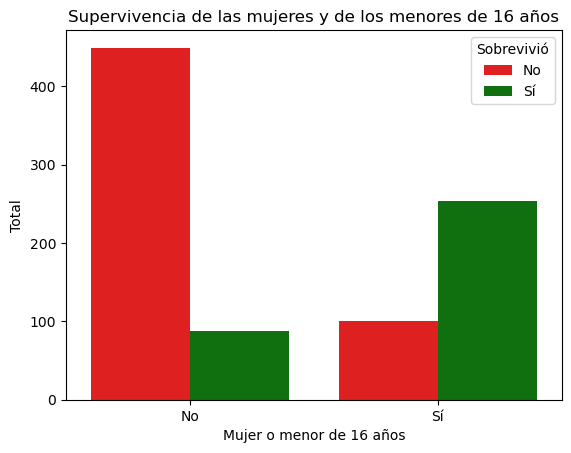

In [28]:
# Como antes, para no usar una serie booleana y que nos de error, tenemos que crear una nueva columna 
datos['Mujer_o_menor_16'] = (datos['Age'] < 16) | (datos['Sex'] == 'female')

ax = sns.countplot(data=datos, x='Mujer_o_menor_16', hue='Survived', palette={0: 'red', 1: 'green'})

plt.title('Supervivencia de las mujeres y de los menores de 16 años')
plt.xlabel('Mujer o menor de 16 años')
plt.ylabel('Total')
plt.xticks([0, 1], ['No', 'Sí'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Sí'], title='Sobrevivió')

plt.show()

In [29]:
round(datos.groupby(["niño_mujer","Survived"])["Survived"].count()/len(datos),2)

niño_mujer  Survived
NO          0           0.50
            1           0.10
SI          0           0.11
            1           0.29
Name: Survived, dtype: float64

Aquí tenemos la misma tabla que arriba, pero expresada en porcentajes según cada grupo y su supervivencia.
Sobre el total de los pasajeros: un 50% eran hombre adultos que no sobrevivieron; un 10% hombres adultos que sobrevivieron; un 11% eran niños o mujeres que no sobrevivieron; y un 29% niños o mujeres que sí siguieron con vida.

##### Clase del billete

Respecto a la clase en la que viajó cada pasajero, era de suponer que los de primera clase sobrevivieron en un mayor porcentaje que el resto, y los de segunda clase también sobrevivieron más que los de tercera. Esto lo podemos ver reflejado en los gráficos mostrados anteriormente, y también en la siguiente tabla, que muestra el porcentaje de supervivencia dependiendo de la clase de tu billete:

In [30]:
datos.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

En primera clase sobrevivió el 63%;  
En segunda, el 47%;  
En tercera, solo el 24%,

No hay una explicación oficial de este motivo, pero podemos deducir que en las labores de rescate se dio preferencia a la gente adinerada que podía permitirse estos billetes sobre el resto de viajeros, pues seguramente fuera gente con mayor status en aquella época (famosos, políticos, ricos...)

Por último, si analizamos conjuntamente tanto el sexo y la edad como la clase en la que viajaron...

In [31]:
# Primera clase
datos[datos["Pclass"] == 1].groupby("niño_mujer")["Survived"].mean()

niño_mujer
NO    0.352941
SI    0.969072
Name: Survived, dtype: float64

In [32]:
# Segunda clase
datos[datos["Pclass"] == 2].groupby("niño_mujer")["Survived"].mean()

niño_mujer
NO    0.080808
SI    0.929412
Name: Survived, dtype: float64

Observamos como ¡el 96%! de niños y mujeres que estaban en primera clase, sobrevivieron.  
En segunda clase lo hizo también un impresionante ¡93%!

#### CONCLUSIÓN

Tras haber realizado este análisis exploratorio de los datos, y juntando toda la información obtenida, podemos concluir que los factores que están más relacionados con que los pasajeros tengan una mayor o menor probabilidad de sobrevivir son la **edad**, el **sexo**, la **clase** en la que se viajó y, en menor medida y relacionado con esto último, el puerto de embarque.

En los datos que hemos ido consiguiendo a lo largo del EDA, observamos que respecto a la supervivencia:

- El 74% de las mujeres sobrevivió (233 de 314), mientras que tan solo el 18.9% de los hombres (109 de 577) siguió con vida.

- El 59% de los menores de 16 años sobrevivió (49 de 83), en cuanto a los mayores, lo hizo el 36.2% (293 de 808).

- Si tenemos en cuenta tanto a los menores de 16 como a las mujeres, sobrevivió el 72% (254 de 354), de los hombres mayores de 16 años solo sobrevivió el 16% (88 de 537).

- En 1ª clase sobrevivió el 63% (136 de 216); en 2ª clase, el 47.3% (87 de 184), y en 3ª clase el 24.2% (119 de 491).

- El puerto de embarque también tuvo cierta influencia en las estadísticas de supervivencia, seguramente relacionado con la riqueza de la ciudad y por tanto con el tipo de billetes comprados y de pasajeros, aunque sobre esto solo podemos hacer suposiciones, pues desconocemos la realidad de la época.  
En definitiva, de los que embarcaron en Cherbourg sobrevivió el 55.4% (93 de 168), siendo el  50% de los billetes de 1ª clase; de Queenstown, sobrevivió el 39% (30 de 77), siendo más del 90% billetes de 3ª clase; y de Southampton, que es de donde partió la mayoría de los viajeros, el 33.7% (217 de 644), siendo el 55% billetes de 3ª clase.

Por último comentar que aunque cada uno de estos factores por sí solo ya supone un importante cambio en las probabilidades de supervivencia, cuantos más factores juntes, mayor será tu porcentaje de supervivencia. Un claro ejemplo lo hemos mencionado justo antes de la conclusión, ya que el 96% de las mujeres o niños que estaban en 1ª clase sobrevivió; mientras que si solo tenemos en cuenta si eran mujeres o niños, pero no la clase, el porcentaje desciende a un 72%.

## Parte 2: Entrena un algoritmo de Regresión Logística para que sea capaz de clasificar adecuadamente a los pasajeros entre los que sobrevivieron y no sobrevivieron (variable "Survived")

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable categórica binaria (es decir, que tenga dos posibles valores) en función de una o más variables independientes.  
En nuestro caso, el modelo de regresión logística que realicemos nos debe clasificar a los pasajeros entre los que sobrevivieron o no (binario) en función del resto de variables de las que disponemos (clase, sexo, edad, puerto...)

#### 1º: Importamos librerías

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 2º: Trabajamos con los datos para ajustarlos a nuestras necesidades

In [34]:
datos_rl = pd.read_csv("titanic.csv")

datos_rl['Age'].fillna(datos_rl['Age'].mean(), inplace=True)  # Rellenar valores faltantes de la edad con la media
datos_rl["Embarked"].fillna(method='ffill', inplace=True)     # Rellenar valores faltantes con valor anterior de la misma columna "forward fill" (solo hay 2 faltantes, por lo que no supone mucho problema)

# Convertir variables categóricas en variables dummy gracias a pandas (es decir, serán binarias para poder ser estudiadas).
# Esto crea nuevas columnas, una para cada categoría, pero con drop_first=True solo se mantienen las columnas necesarias para evitar la multicolinealidad. En este caso, se crean las columnas 'Sex_male', 'Embarked_Q' y 'Embarked_S'.
datos_rl = pd.get_dummies(datos_rl, columns=['Sex', 'Embarked'], drop_first=True)

# Seleccionamos las variables independientes que tienen relevancia en la supervivencia y la variable binaria objetivo que queremos investigar (survived)
X = datos_rl[['Pclass', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = datos_rl['Survived']

# Dividimos en un conjunto de entrenamiento y otro de prueba (20% de los datos; =42 es la convención, pero puede ser cualquier cifra, o incluso ninguna)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3º: Creamos el modelo de regresión logística

In [35]:
modelo_rl = LogisticRegression()

# Entrenamos el modelo
modelo_rl.fit(X_train, y_train)

# Predecimos con los datos de prueba
y_pred = modelo_rl.predict(X_test)

#### 4º: Evaluación del modelo

In [36]:
precision = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo es del {precision * 100:.2f}%')

La precisión del modelo es del 79.89%


Es decir, de los 179 casos que se predijeron en el entrenamiento, se acertó en 143 (143/179=0.7989), ya sea diciendo que no sobrevivieron y en efecto no sobrevivieron; o en el caso contrario, prediciendo que sobrevivirían y acertando.

In [37]:
print("Tabla con el reporte de clasificación:")
print(classification_report(y_test, y_pred))

Tabla con el reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Siendo la fila '0' fallecidos y la '1' supervivientes, esta tabla nos muestra lo siguiente:
- precision: indica la porporción de cuántos de los casos predichos de una forma son realmente correctos, tiene en cuenta los falsos positivos (88/107=0.82 y 55/72=0.76).
- recall: indica cuántos de los casos positivos reales fueron capturados, tiene en cuenta los falsos negativos (88/108=0.84 y 55/74=0.74).
- f1-score: es una media de los datos de 'precision' y 'recall'.
- support: indica cuántos ejemplos hay de cada clase en los datos de entrenamiento.  
--
- accuracy (exactitud): proporción de todas las predicciones que fueron correctas.
- macro avg: es el promedio total, sin ponderación algua.
- weighted avg: es el promedio ponderado, según el peso de cada clase.

Matriz de confusión:
[[88 17]
 [19 55]]


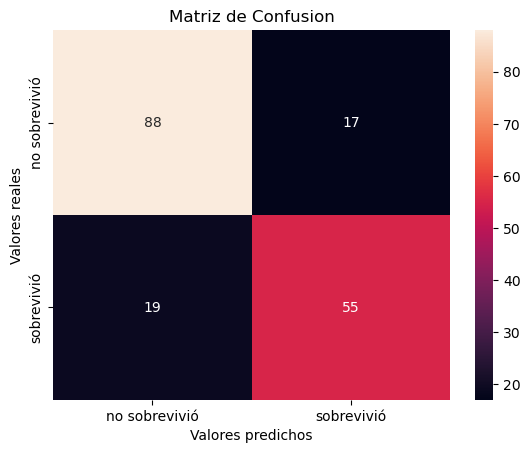

In [38]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Graficamos la matriz de confusion para que visualmente se entienda mejor
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores reales')
ax.set_title('Matriz de Confusion')
ax.xaxis.set_ticklabels(['no sobrevivió', 'sobrevivió'])
ax.yaxis.set_ticklabels(['no sobrevivió', 'sobrevivió'])

plt.show()

Esto, traducido a texto, significa que:
- 88 pasajeros que en la realidad no sobrevivieron fueron clasificados correctamente por nuestro modelo.
- 17 pasajeros que no sobrevivieron fueron clasificados incorrectamente como sobrevivientes.
- 19 pasajeros que sobrevivieron fueron clasificados incorrectamente como no sobrevivientes.
- 55 pasajeros que sobrevivieron fueron clasificados correctamente.

Por todo ello, podemos concluir que nuestro modelo de regresión lineal, si bien no es perfecto, porque su precisión es del 80%, es bastante eficaz a la hora de predecir la supervivencia o no de los pasajeros. Seguramente, si ajustasemos el modelo con otros parámetros, o si se empleasen otros modelos más avanzados, podríamos acercarnos a un 'modelo más perfecto'. Pero como decimos, estos resultados satisfacen nuestro objetivo de buscar un modelo que prediga si los pasajeros sobrevivían o no teniendo en cuenta la información disponible.

#### Finalmente, generaremos un nuevo archivo CSV con los resultados finales de nuestra predicción para poder consultarlos:

In [39]:
# DF solo con los PassengerId de los pasajeros del conjunto de prueba (179 elementos)
datos_ids = datos_rl.loc[X_test.index, 'PassengerId']

# Establecemos el formato de nuestro CSV (Id + predicción)
pred_final = pd.DataFrame({"PassengerId": datos_ids, "Survived": y_pred})

pred_final = pred_final.sort_values(by="PassengerId").reset_index(drop=True)

# Creación del CSV
pred_final.to_csv('prediccion_regresion_lineal.csv', index=False)

print(pred_final.head())

   PassengerId  Survived
0            6         0
1           11         1
2           24         0
3           26         0
4           31         0
